## House Price Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [4]:
train_set = pd.read_csv('train.csv')
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_set = pd.read_csv('test.csv')
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [7]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
obj_attribute =train_set.select_dtypes(include='object')
obj_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [10]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


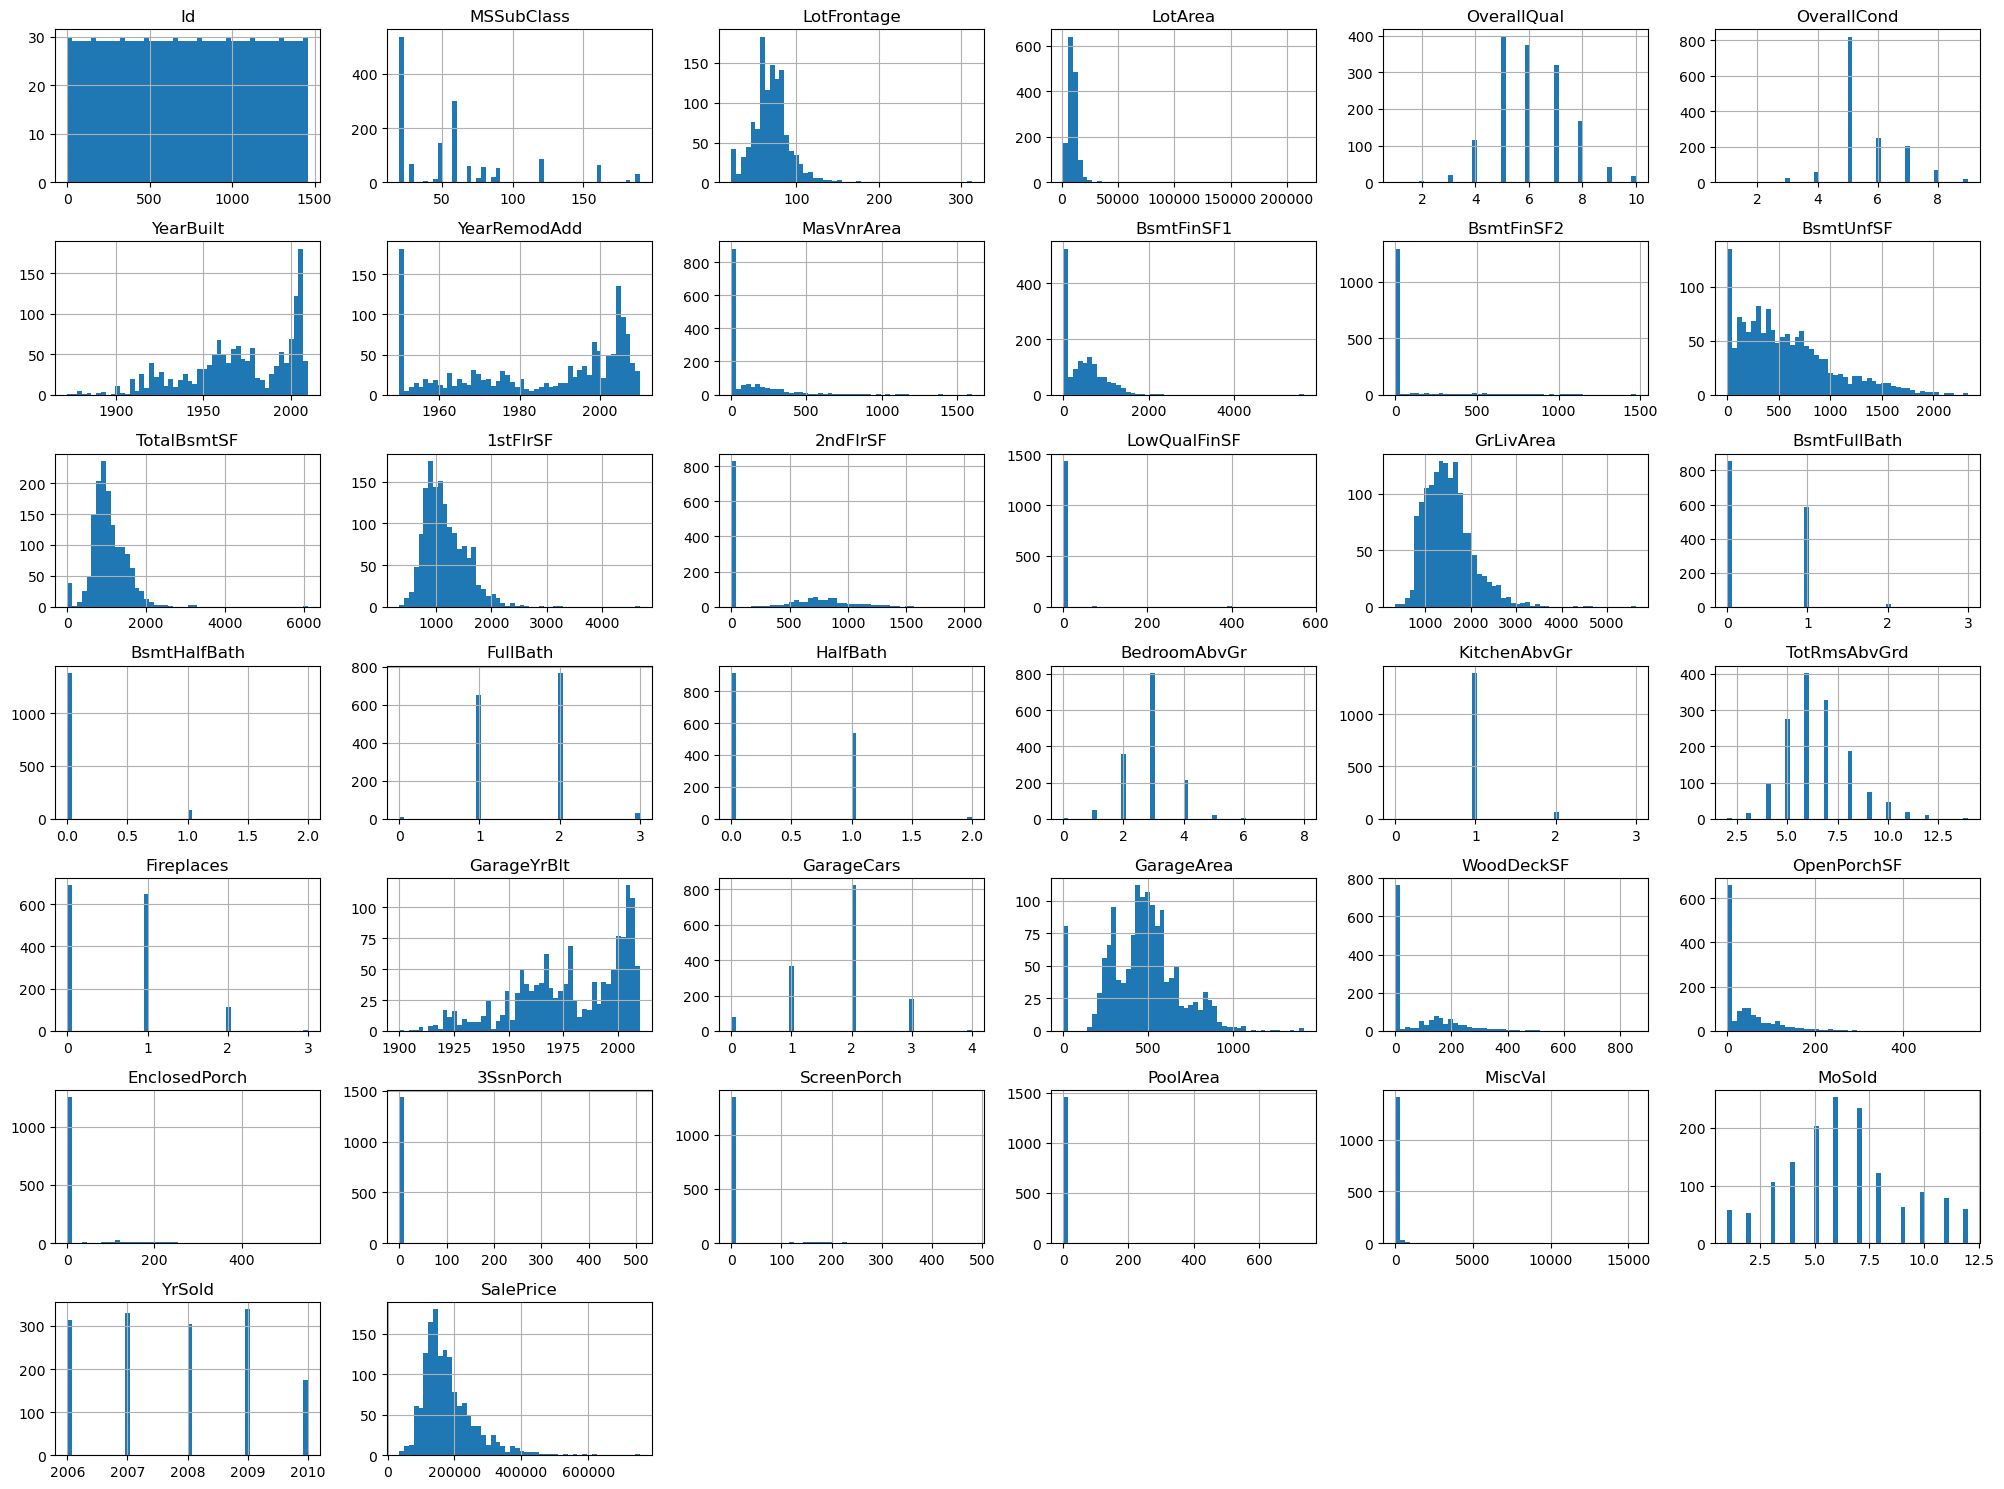

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [14]:
num_attributes = train_set.select_dtypes(include=['int64','float64'])
num_attributes.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\jupyter\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

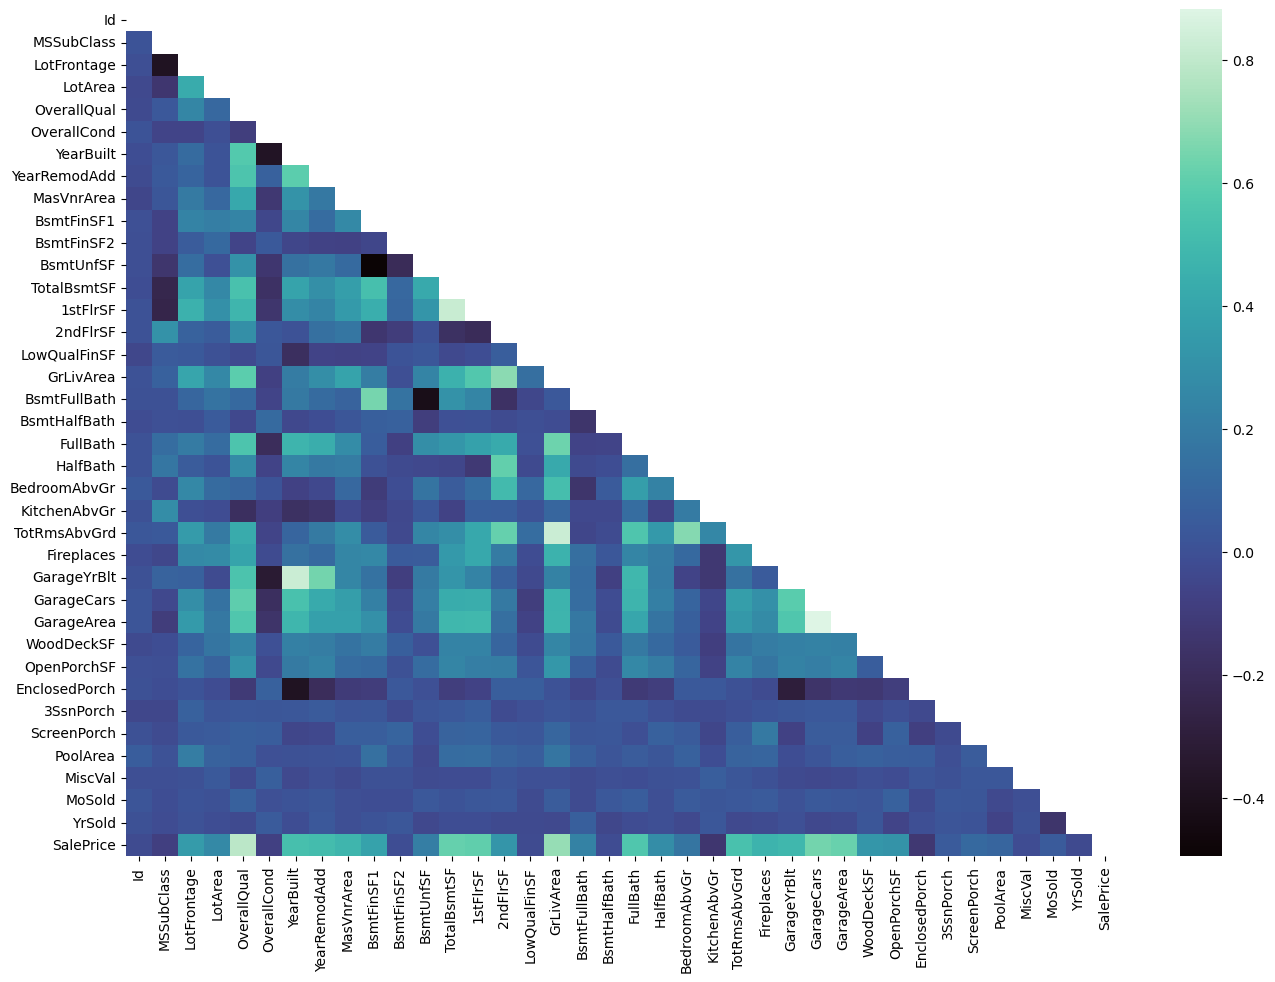

In [12]:
plt.figure(figsize=(16,11))

correlation_matrix=num_attributes.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True,
            mask=mask, cmap='mako',
            fmt='.1f', cbar=True)

In [15]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


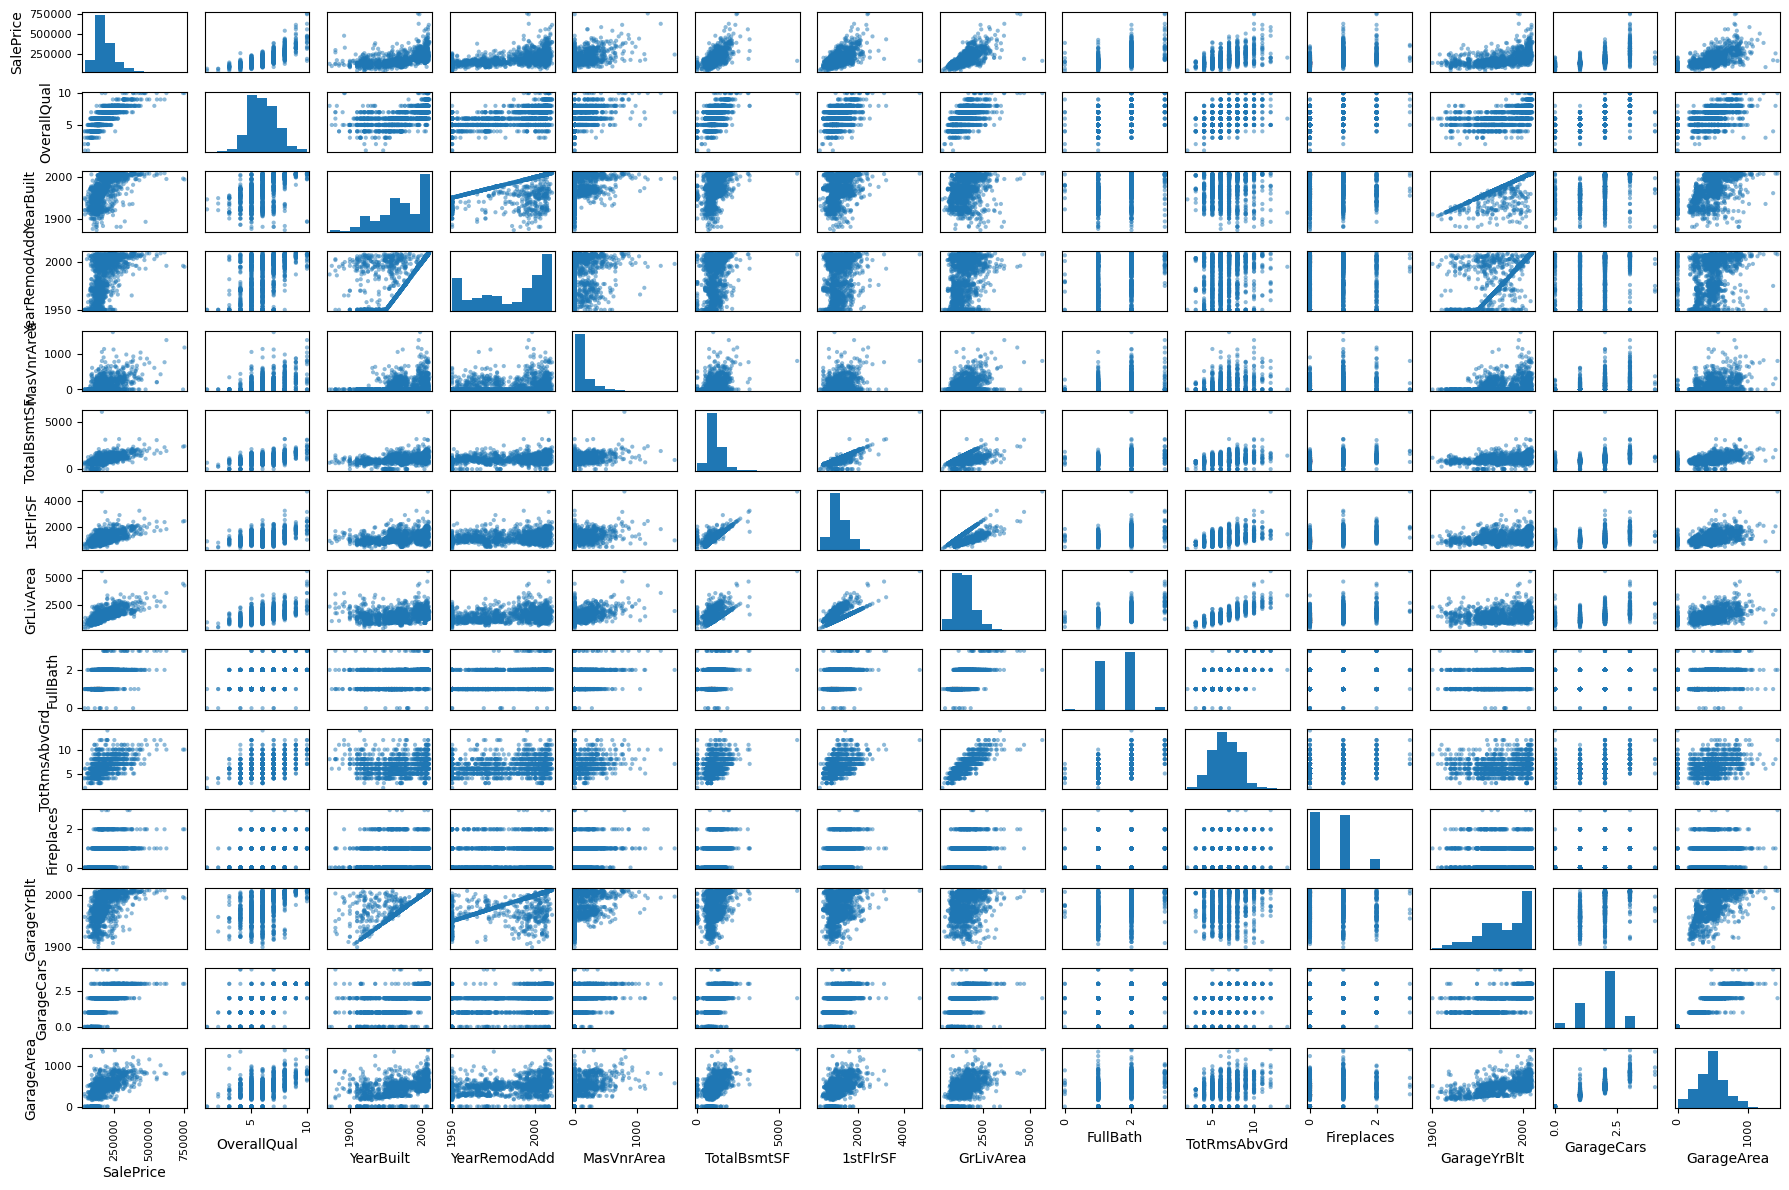

In [18]:
imp_attributes = ['SalePrice','OverallQual', 'YearBuilt','YearRemodAdd', 'MasVnrArea','TotalBsmtSF','1stFlrSF',
                  'GrLivArea', 'FullBath','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']

from pandas.plotting import scatter_matrix
scatter_matrix(train_set[imp_attributes], figsize=(18, 12))

plt.tight_layout()
plt.show()

## Validation Set

In [19]:
y = train_set.SalePrice
X = train_set.drop(labels='SalePrice', axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Train_Set Cleaning and Transformation

1.Clearing missing values of numerical features

In [21]:
from sklearn.impute import SimpleImputer
def missing_numerical(X_train):
    imputer = SimpleImputer(strategy="median") #a. creating imputer instance

    X_num = X_train.select_dtypes(include=['int64','float64']) #choosing num attributes
    imputer.fit(X_num) #b. fitting
    # It computed the mean of each attribute and stored the result in statistics_ instance variable

    X = imputer.transform(X_num) #c. transformed the data as per requirement and generated a plain np array
    train_X = pd.DataFrame(X, columns=X_num.columns)
    return train_X
train_X = missing_numerical(X_train)
val_X = missing_numerical(X_val)

## 2.Clearing missing values of categorical features

In [22]:
from sklearn.preprocessing import OneHotEncoder
obj_encoder = OneHotEncoder() #a.making onehotencoder object
housing_1hot = obj_encoder.fit_transform(obj_attribute) #b.fitting and transforming in one go
housing_1hot

<1460x267 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

## Creating a pipeline

Train a Model and generate results

In [23]:
#choosing the attributes we worked on earlier
imp_attributes.remove('SalePrice')
train_X_imp = train_X[imp_attributes]
val_X_imp = val_X[imp_attributes]

In [24]:
dict_mse={}

In [26]:
from sklearn.metrics import mean_squared_error

def model_application(model, model_name, train_X, y_train, val_X, y_val):
    model.fit(train_X, y_train)

    predictions = model.predict(val_X)

    mse = mean_squared_error(y_val, predictions)
    dict_mse[model_name] = np.sqrt(mse)
    dict_mse[model_name]
    return model  #returning trained model


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = model_application(lr_model, 'Linear Regression for important attributes', train_X_imp, y_train, val_X_imp, y_val)
lr_model_imp = LinearRegression()
lr_model = model_application(lr_model_imp, 'Linear Regression', train_X, y_train, val_X, y_val)

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg = model_application(tree_reg, 'Decision Tree Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)
tree_reg_imp = DecisionTreeRegressor()
tree_reg = model_application(tree_reg_imp, 'Decision Tree Regressor', train_X, y_train, val_X, y_val)

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = model_application(forest_reg, 'Random Forest Regressor', train_X, y_train, val_X, y_val)
forest_reg_imp = RandomForestRegressor()
forest_reg_imp = model_application(forest_reg_imp, 'Random Forest Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)


In [29]:
dict_mse

{'Linear Regression for important attributes': 44180.408771731956,
 'Linear Regression': 43666.65616313197,
 'Decision Tree Regressor for important attributes': 49296.38688794885,
 'Decision Tree Regressor': 44145.916946662735,
 'Random Forest Regressor': 37699.58696263871,
 'Random Forest Regressor for important attributes': 40299.34266082559}

In [30]:
def display_scores(scores):
    print("Individual Error Scores:", scores)
    print("Mean error:", scores.mean())
    print("Standard deviation:", scores.std())


from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_X, y_train,
                         scoring="neg_mean_squared_error", cv=10)
cv_rmse_scores = np.sqrt(-scores)

display_scores(cv_rmse_scores)

Individual Error Scores: [26257.40611675 17518.69477372 27664.38396228 25738.26300131
 44543.88479676 27505.11915948 26697.31691752 31107.37684437
 22853.97308376 30801.13201821]
Mean error: 28068.755067415022
Standard deviation: 6615.897152756846


## Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,40,50],
      'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_X, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=40)

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

39844.08810716824 {'max_features': 2, 'n_estimators': 3}
32419.581179001372 {'max_features': 2, 'n_estimators': 10}
30387.295912570982 {'max_features': 2, 'n_estimators': 30}
31045.94155862205 {'max_features': 2, 'n_estimators': 40}
30564.050429901232 {'max_features': 2, 'n_estimators': 50}
35307.42867595441 {'max_features': 4, 'n_estimators': 3}
31597.041663787306 {'max_features': 4, 'n_estimators': 10}
29354.946019497 {'max_features': 4, 'n_estimators': 30}
29286.680431123164 {'max_features': 4, 'n_estimators': 40}
28993.65808488995 {'max_features': 4, 'n_estimators': 50}
35565.17130888933 {'max_features': 6, 'n_estimators': 3}
30112.385069081112 {'max_features': 6, 'n_estimators': 10}
28415.04457287734 {'max_features': 6, 'n_estimators': 30}
28523.737852784147 {'max_features': 6, 'n_estimators': 40}
28645.982299039453 {'max_features': 6, 'n_estimators': 50}
35546.20085519646 {'max_features': 8, 'n_estimators': 3}
30044.219914724003 {'max_features': 8, 'n_estimators': 10}
28801.07089

## Generating Results and Submitting to Competition

In [34]:
test_X = missing_numerical(testset) #dealing with numerical missing values
test_X_imp = test_X[imp_attributes]

my_result = forest_reg.predict(test_X) #predicting

# Saving the result into submission file
submission = pd.read_csv('sample_submission.csv')
submission["SalePrice"] = my_result
submission.to_csv('submission.csv', index=False)

NameError: name 'testset' is not defined